In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | kuchaiburi
Processing Record 4 of Set 1 | rio verde de mato grosso
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | la passe
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | udachny
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | morehead city
Processing Record 15 of Set 1 | qamdo
Processing Record 16 of Set 1 | mandimba
City not found. Skipping...
Processing Record 17 of Set 1 | newman
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | abilene
Processing Record 20 of Set 1 | isafjordur
Processing Record 21 of Set 1 | klyuchi
Proces

Processing Record 37 of Set 4 | new norfolk
Processing Record 38 of Set 4 | santa elena de uairen
Processing Record 39 of Set 4 | roma
Processing Record 40 of Set 4 | kavaratti
Processing Record 41 of Set 4 | hobyo
Processing Record 42 of Set 4 | san martin
Processing Record 43 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 44 of Set 4 | yanchep
Processing Record 45 of Set 4 | caluula
Processing Record 46 of Set 4 | koumra
Processing Record 47 of Set 4 | talnakh
Processing Record 48 of Set 4 | mpulungu
Processing Record 49 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 0 of Set 5 | cidade velha
Processing Record 1 of Set 5 | bahir dar
Processing Record 2 of Set 5 | iskateley
Processing Record 3 of Set 5 | padang
Processing Record 4 of Set 5 | punta arenas
Processing Record 5 of Set 5 | san julian
Processing Record 6 of Set 5 | nar'yan-mar
Processing Record 7 of Set 5 | brokopondo
Processing Record 8 of Set 5 | laboulaye
Processing 

Processing Record 31 of Set 8 | obihiro
Processing Record 32 of Set 8 | isle of lewis
City not found. Skipping...
Processing Record 33 of Set 8 | kuala belait
Processing Record 34 of Set 8 | thief river falls
Processing Record 35 of Set 8 | warrnambool
Processing Record 36 of Set 8 | kidal
Processing Record 37 of Set 8 | pehowa
Processing Record 38 of Set 8 | san isidro
Processing Record 39 of Set 8 | hudiksvall
Processing Record 40 of Set 8 | kailua-kona
Processing Record 41 of Set 8 | la villa del rosario
Processing Record 42 of Set 8 | remire-montjoly
Processing Record 43 of Set 8 | tsengel
Processing Record 44 of Set 8 | alekseyevskoye
Processing Record 45 of Set 8 | dunedin
Processing Record 46 of Set 8 | fort-shevchenko
Processing Record 47 of Set 8 | akureyri
Processing Record 48 of Set 8 | veraval
Processing Record 49 of Set 8 | humberto de campos
Processing Record 0 of Set 9 | saratamata
City not found. Skipping...
Processing Record 1 of Set 9 | mahibadhoo
Processing Record 2 

Processing Record 20 of Set 12 | harstad
Processing Record 21 of Set 12 | shimoda
Processing Record 22 of Set 12 | celestun
Processing Record 23 of Set 12 | plastun
Processing Record 24 of Set 12 | san pedro pochutla
Processing Record 25 of Set 12 | cill airne
Processing Record 26 of Set 12 | kyzyl-suu
Processing Record 27 of Set 12 | baldeogarh
Processing Record 28 of Set 12 | nogliki
Processing Record 29 of Set 12 | jiujiang
Processing Record 30 of Set 12 | san jose de jachal
Processing Record 31 of Set 12 | magadan
Processing Record 32 of Set 12 | zhigalovo
Processing Record 33 of Set 12 | palmerston
Processing Record 34 of Set 12 | thunder bay
Processing Record 35 of Set 12 | tazacorte
Processing Record 36 of Set 12 | sangkhla buri
Processing Record 37 of Set 12 | sinop
Processing Record 38 of Set 12 | corner brook
Processing Record 39 of Set 12 | tirschenreuth
Processing Record 40 of Set 12 | livingston
Processing Record 41 of Set 12 | emporia
Processing Record 42 of Set 12 | port

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,45.03,89,80,30.94,TF,1708405920
1,adamstown,-25.0660,-130.1015,78.13,86,75,10.83,PN,1708405924
2,kuchaiburi,22.2667,86.1667,89.26,24,10,10.38,IN,1708406429
3,rio verde de mato grosso,-18.9181,-54.8442,72.70,94,100,1.23,BR,1708406430
4,edinburgh of the seven seas,-37.0676,-12.3116,59.50,64,43,9.69,SH,1708405935


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,45.03,89,80,30.94,TF,1708405920
1,adamstown,-25.0660,-130.1015,78.13,86,75,10.83,PN,1708405924
2,kuchaiburi,22.2667,86.1667,89.26,24,10,10.38,IN,1708406429
3,rio verde de mato grosso,-18.9181,-54.8442,72.70,94,100,1.23,BR,1708406430
4,edinburgh of the seven seas,-37.0676,-12.3116,59.50,64,43,9.69,SH,1708405935


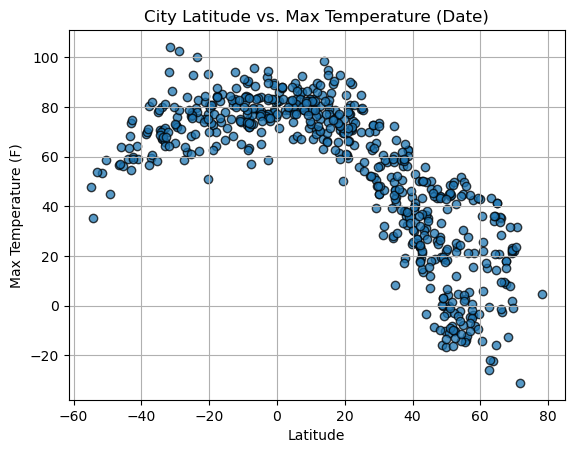

In [16]:
# Plot Latitude vs. Temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("output_plots/latitude_vs_temperature.png")
plt.show()

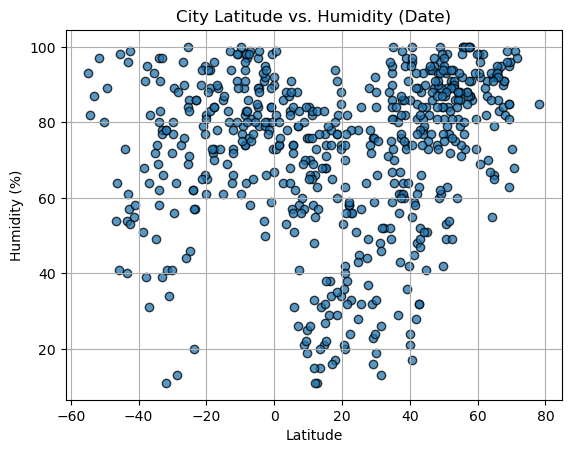

In [17]:
# Plot Latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("output_plots/latitude_vs_humidity.png")
plt.show()

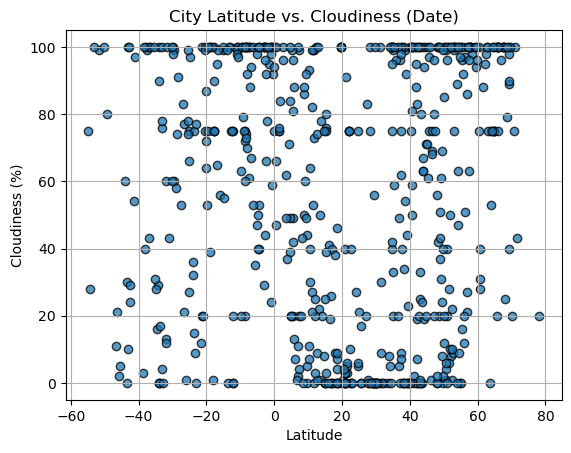

In [18]:
# Plot Latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("output_plots/latitude_vs_cloudiness.png")
plt.show()

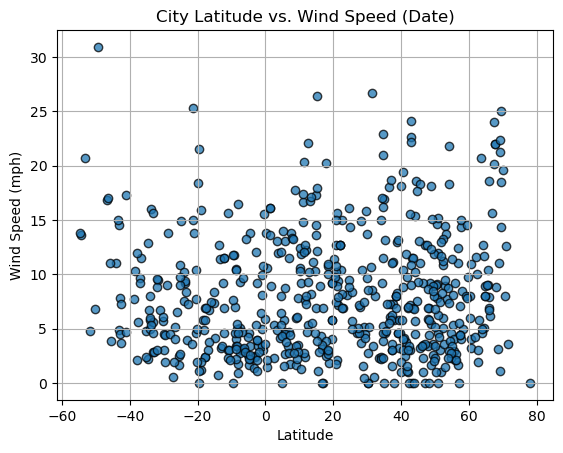

In [19]:
# Plot Latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("output_plots/latitude_vs_wind_speed.png")
plt.show()

In [20]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    
    # Annotate line equation
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    
    # Set labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} Hemisphere: {y_label} vs. {x_label}")
    
    # Print r-value
    print(f"The r-value is: {rvalue}")
    
    # Show plot
    plt.legend()
    plt.grid(True)
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

In [24]:
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kuchaiburi,22.2667,86.1667,89.26,24,10,10.38,IN,1708406429
5,la passe,45.5549,-0.8967,49.98,94,97,3.24,FR,1708405993
8,udachny,66.4167,112.4000,-2.56,83,100,6.15,RU,1708405933
9,ribeira grande,38.5167,-28.7000,62.78,95,99,8.01,PT,1708405983
10,bethel,41.3712,-73.4140,26.96,59,2,3.74,US,1708405923


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,45.03,89,80,30.94,TF,1708405920
1,adamstown,-25.0660,-130.1015,78.13,86,75,10.83,PN,1708405924
3,rio verde de mato grosso,-18.9181,-54.8442,72.70,94,100,1.23,BR,1708406430
4,edinburgh of the seven seas,-37.0676,-12.3116,59.50,64,43,9.69,SH,1708405935
6,puerto natales,-51.7236,-72.4875,53.55,97,99,4.79,CL,1708405947


The r-value is: -0.8425293604242239


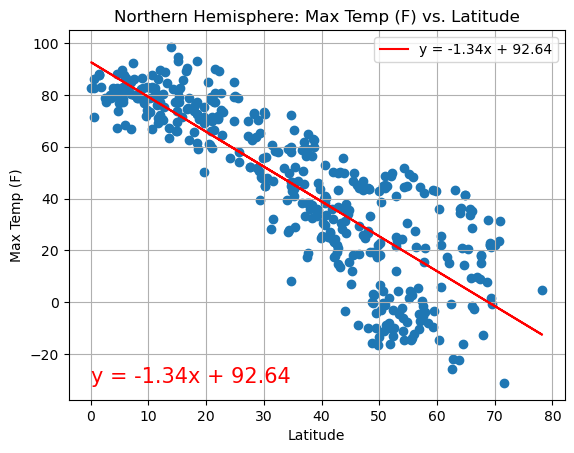

In [25]:
#Temperature vs. Latitude Linear Regression Plot
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp (F)", "Northern")

The r-value is: 0.5275300959251117


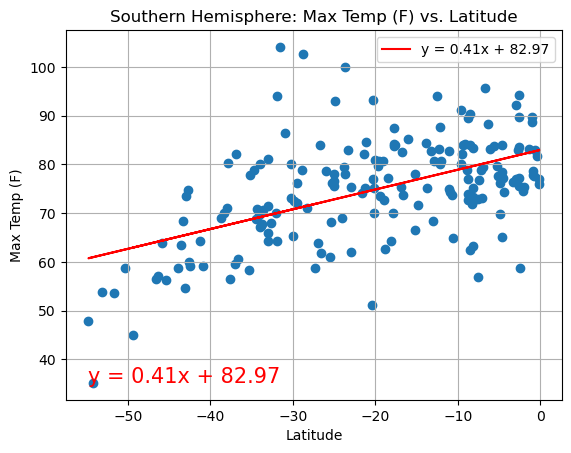

In [26]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp (F)", "Southern")

The r-value is: 0.4378128507898229


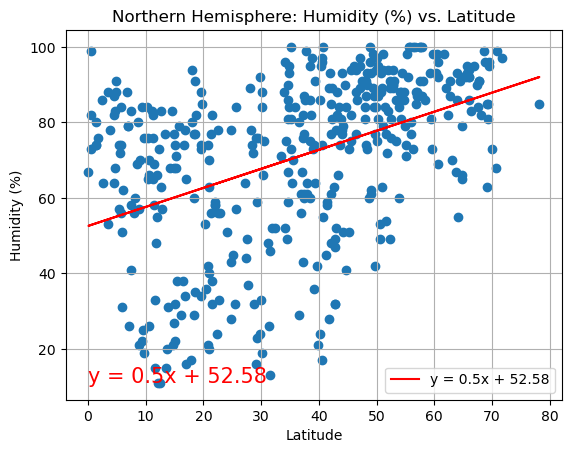

In [27]:
#Humidity vs. Latitude Linear Regression Plot
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Northern")

The r-value is: 0.29141577528197055


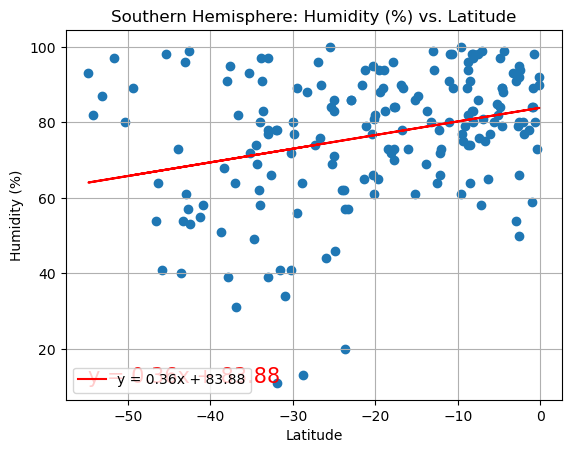

In [28]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Southern")

The r-value is: 0.26327690367932


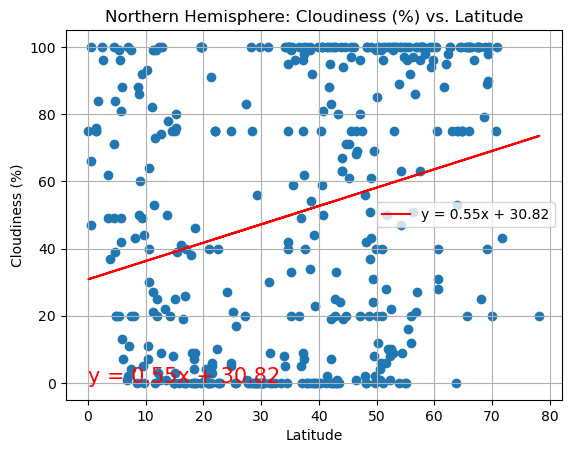

In [29]:
# Cloudiness vs. Latitude Linear Regression Plot
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern")

The r-value is: 0.2953638998477848


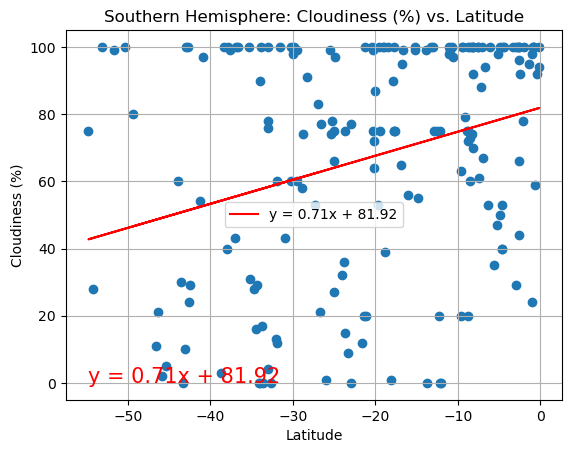

In [30]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern")

The r-value is: 0.041365390259634656


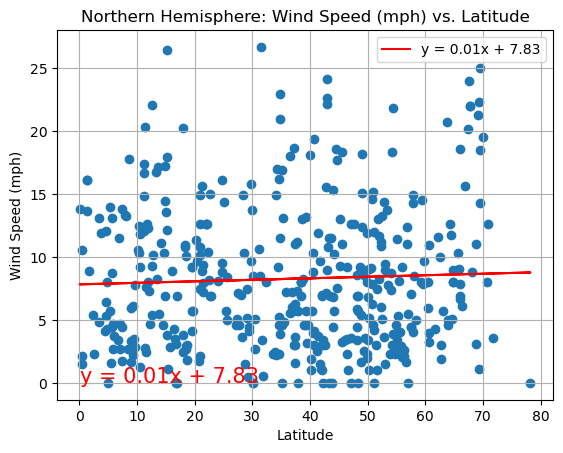

In [31]:
#Wind Speed vs. Latitude Linear Regression Plot
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Northern")

The r-value is: -0.30706950678520006


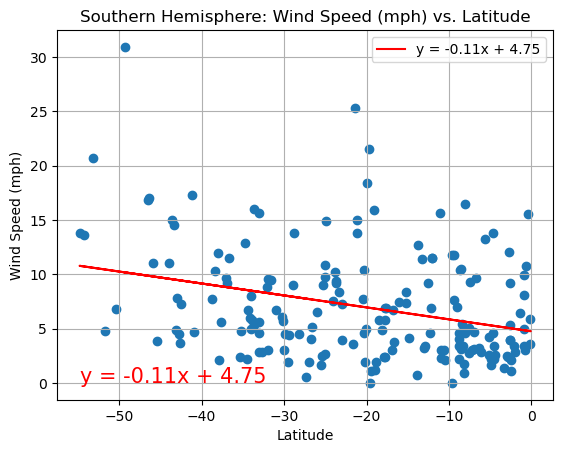

In [32]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Southern")